In [15]:
#Load the Dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv').drop('index', axis=1)

# Display the first few rows of the dataframe
print(data.head())


                    City       Date  Card Type Exp Type Gender  Amount
0           Delhi, India  29-Oct-14       Gold    Bills      F   82475
1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
4       Bengaluru, India   5-May-15       Gold    Bills      F  171574


In [16]:
# Data Cleaning
import numpy as np

# Replace placeholder dates (e.g., ########) with NaN and then fill with a specific strategy (e.g., forward fill)
data['Date'] = data['Date'].replace('########', np.nan).ffill()

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Extract useful features from the Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop the original Date column as it's no longer needed
data.drop(columns=['Date'], inplace=True)


In [17]:
#Feature Selection
# Define the feature columns and target column
features = ['City', 'Card Type', 'Exp Type', 'Gender', 'Year', 'Month', 'Day']
target = 'Amount'


In [18]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One-hot encode categorical features with handling unknown categories
categorical_features = ['City', 'Card Type', 'Exp Type', 'Gender']
numerical_features = ['Year', 'Month', 'Day']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])


In [19]:
# Linear regression Model Training
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Card Type',
                                                   'Exp Type', 'Gender']),
                                                 ('num', 'passthrough',
                                                  ['Year', 'Month', 'Day'])])),
                ('regressor', LinearRegression())])

In [20]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 10732050558.995571
R^2 Score: -0.024667839404277858


In [21]:
#Display First Few Predictions
print(y_pred[:5])  #displaying first 5 predictions

[107015.17167774 159414.75386019 161482.87429811 157429.59998391
 163925.36033658]


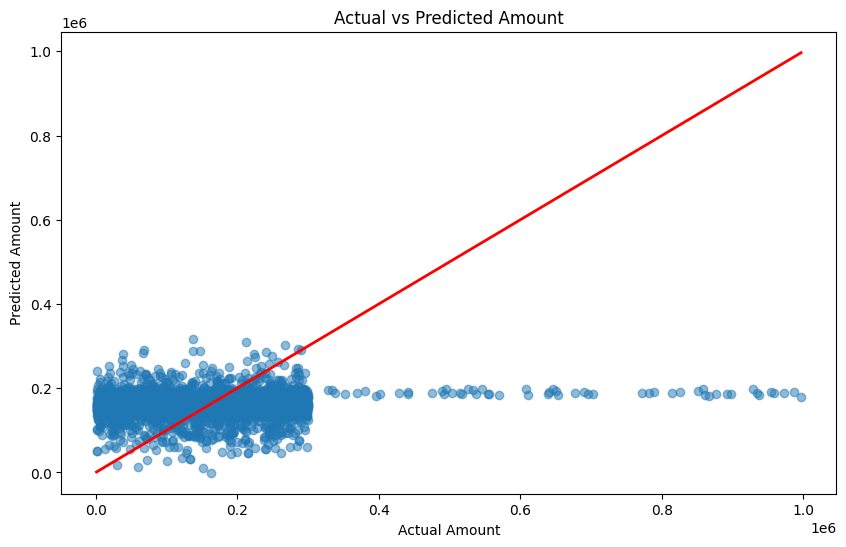

In [22]:
import matplotlib.pyplot as plt

# Plot predicted vs actual amount
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Amount')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.show()


In [23]:
# Print 5 actual values and their predicted values
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f'Actual: {actual}, Predicted: {predicted}')


Actual: 110246, Predicted: 107015.17167774006
Actual: 146706, Predicted: 159414.7538601905
Actual: 33141, Predicted: 161482.87429810897
Actual: 81374, Predicted: 157429.599983908
Actual: 186422, Predicted: 163925.36033658334
